In [ ]:
# Invierto los meses 1 y 2 un monto fijo de $ 5000

# ppm = monto / nominales
# nominales=  monto / ppm

precios = $ 50, $ 100
cantidades = 100 nominales, 50 nominales
precio medio = 75 (Falso)



In [2]:
from statistics import harmonic_mean

In [4]:
harmonic_mean([50,100])

66.66666666666667

In [ ]:
Tengo una cartera con los siguientes P/B

pb = [1.2, 1, 0.9, 0.8]


# Bases de Datos introducción

* claves foraneas
* claves primarias

<img src='imagenes/BBDD.jpeg' width='600'>

Y así sucesivamente se pueden ir creando nuevas entidades que se van relacionando con otras

En este caso vamos a agregar a nuestro modelo de subyacentes y derivados, una entidad de "fondos" que podrian ser FCIs y "clientes" que podrian ser las cuentas de un Alyc

<img src='imagenes/BBDD2.jpeg' width='600'>

# XAMPP

## Configuracion Apache y puerto http

Configuraciones Iniciales, no necesariamente pero si al darrle "start" al Apache aparece un conflicto de puertos, hay que configurar un puerto diferente al 80 que es el default

<img src='imagenes/xampp_1.png' width=750>

<img src='imagenes/xampp_2.png' width=750>

<img src='imagenes/xampp_3.png' width=750>

## Configuracion MySQL y puerto de BBDD

<img src='imagenes/xampp_4.png' width=750>

<img src='imagenes/xampp_5.png' width=750>

## Configuracion general  XAMMP

<img src='imagenes/xampp_6.png' width=800>

<img src='imagenes/xampp_7.png' width='600'>

<img src='imagenes/xampp_8.png'  width='600'>

# Crear Base de datos

<img src='imagenes/xampp_9.png'  width='700'>

# API FMP

In [1]:
apikey = '66c44b016256f8b9e507838f32434ece'
apikey = '7bcec62b64a5ccd1f35fc2036c768593'
apikey = '2f08561fe33be29429d696aed288539e'
apikey = '938c4b4dece598e20a115db9b9d3d5e9'
apikey = 'f0bdfc9adbb9cad589dadedfd786d499'

In [2]:
import requests
import pandas as pd

## Paneles precios RealTime

In [4]:
paneles = ['etf','commodity','euronext','nyse','amex','nasdaq','tsx','index','mutual_fund']

In [5]:
def getPanel(exchange):
    url = 'https://fmpcloud.io/api/v3/quotes/'+exchange
    p = {'apikey': apikey}
    r = requests.get(url, params = p)
    js = r.json()
    df = pd.DataFrame(js)
    df.set_index('symbol', inplace=True)
    return df

In [6]:
paneles_px = {}
for panel in paneles:
    print(panel, end=', ')
    paneles_px[panel] = getPanel(panel)

etf, commodity, euronext, nyse, amex, nasdaq, tsx, index, mutual_fund, 

In [7]:
print(paneles_px['nasdaq'].columns, paneles_px['nasdaq']['price'])

Index(['name', 'price', 'changesPercentage', 'change', 'dayLow', 'dayHigh',
       'yearHigh', 'yearLow', 'marketCap', 'priceAvg50', 'priceAvg200',
       'volume', 'avgVolume', 'exchange', 'open', 'previousClose', 'eps', 'pe',
       'earningsAnnouncement', 'sharesOutstanding', 'timestamp'],
      dtype='object') symbol
MMDM       1.320
MORN     184.950
TITN      15.070
FCNCA    391.945
SIGA       6.848
          ...   
TBKCP     26.000
PSTVZ      0.007
NUROW      0.142
TSLA     448.740
SLM        9.440
Name: price, Length: 4201, dtype: float64


In [8]:
accion = paneles_px['nasdaq'].loc['AAPL']
accion

name                                      Apple Inc.
price                                         120.32
changesPercentage                              -0.32
change                                         -0.39
dayLow                                        119.29
dayHigh                                       121.54
yearHigh                                      137.98
yearLow                                      53.1525
marketCap                                2.05777e+12
priceAvg50                                   116.868
priceAvg200                                  94.9031
volume                                   8.48191e+07
avgVolume                                1.73038e+08
exchange                                      NASDAQ
open                                          121.28
previousClose                                 120.71
eps                                            3.296
pe                                           36.5049
earningsAnnouncement    2020-10-29T20:00:00.00

<AxesSubplot:ylabel='Density'>

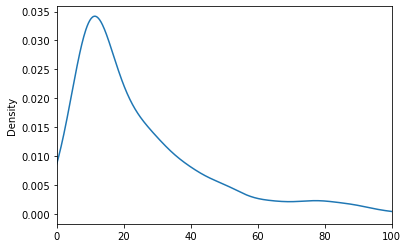

In [9]:
nasdaq = paneles_px['nasdaq']
nasdaq.loc[(nasdaq.pe>0) & (nasdaq.pe<100)].pe.plot(kind='kde', xlim=(0,100))

## Screeners (ponele)

In [10]:
def screenMktCapHigh(minMktCap= 10**10):
    url = 'https://fmpcloud.io/api/v3/stock-screener'
    p = {'apikey': apikey, 'marketCapMoreThan':minMktCap }
    r = requests.get(url, params = p)
    js = r.json()
    df = pd.DataFrame(js)
    return df

In [11]:
%%time
data = screenMktCapHigh().drop('companyName', axis=1)
data

Wall time: 1.08 s


,symbol,marketCap,sector,industry,beta,price,lastAnnualDividend,volume,exchange,exchangeShortName
0,SBER.ME,4.389696e+12,Banking,Banks,1.53469,203.35,18.7000,57146978,MCX,EURONEXT
1,GAZP.ME,3.948479e+12,Energy,Energy,1.32515,166.99,15.2400,38340791,MCX,EURONEXT
2,GMKN.ME,3.117743e+12,Metals & Mining,Materials,0.70708,19702.00,1161.2900,284003,MCX,EURONEXT
3,LKOH.ME,2.783234e+12,Energy,Energy,1.00975,4265.50,542.0000,1069296,MCX,EURONEXT
4,AAPL,2.064443e+12,Technology,Consumer Electronics,1.33956,120.71,0.7825,173662673,Nasdaq Global Select,NASDAQ
...,...,...,...,...,...,...,...,...,...,...
1158,ALB,1.003807e+10,Basic Materials,Specialty Chemicals,1.34052,94.38,1.4875,1154121,New York Stock Exchange,NYSE
1159,DISCK,1.003131e+10,Communication Services,Entertainment,1.63575,18.92,0.0000,2476729,Nasdaq Global Select,NASDAQ
1160,EDEN.PA,1.002947e+10,Financial Services,Credit Services,0.74663,40.81,0.7000,400243,Paris,EURONEXT
1161,ILD.PA,1.001172e+10,Communication Services,Telecom Services,0.17441,170.75,2.6000,70685,Paris,EURONEXT


# Manejo de directorios (Básico)

In [12]:
import os

In [13]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders'

In [14]:
#os.mkdir('Persistencia')
os.chdir('Persistencia')

In [15]:
scan = os.scandir()
for elemento in scan:
    if elemento.is_dir():
        print(elemento.name)

excels_sp500
ujsons


In [16]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia'

In [19]:
scan = os.scandir()
for elemento in scan:
    if elemento.is_file():
        print(elemento.name, elemento.stat().st_size//1024)

aqui_no_hay_nada_archivo_test.txt 0


# Persistencia en MySQL

In [21]:
# !pip install PyMySQL
from sqlalchemy import create_engine

#Seteo el USER : PASS @ HOST / BBDD_NAME
sql_engine = create_engine('mysql+pymysql://root:@localhost/test')
sql_conn = sql_engine.connect()

In [22]:
%%timeit
data.to_sql(con=sql_conn, name='fmp', if_exists='replace')

222 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Persistencia en SQLite

In [23]:
from sqlalchemy import create_engine
sqlite_engine = create_engine('sqlite:///fmp.db', echo=False)
sqlite_conn = sqlite_engine.connect()

In [24]:
%%timeit
data.to_sql(con=sqlite_conn, name='fmp', if_exists='replace')

59.5 ms ± 7.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Persistencia en Archivos

In [25]:
%%timeit
data.to_excel('fmp.xlsx')

270 ms ± 23.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%%timeit
data.to_csv('fmp.csv')

13.2 ms ± 345 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
import json
js = data.to_dict()

In [28]:
%%timeit
with open('fmp.json', 'w') as f:
    json.dump(js, f)

50.7 ms ± 4.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
import ujson

In [30]:
%%timeit
with open('fmp.ujson', 'w') as f:
    ujson.dump(js, f)

6.01 ms ± 255 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Persistencia con tablas "grandes"

In [31]:
import yfinance as yf
import pandas as pd

In [32]:
%%time
sp500_wiki = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers = list(sp500_wiki.Symbol)
sp500_tickers = [t for t in sp500_tickers if t not in ['BRK.B' ,'BF.B']]

Wall time: 2.35 s


In [33]:
# ya que estamos
pd.DataFrame(sp500_tickers).to_sql(con=sql_conn, name='sp500tickers', if_exists='replace')

In [34]:
# ya que estamos
pd.DataFrame(sp500_tickers).to_sql(con=sqlite_conn, name='sp500tickers', if_exists='replace')

In [35]:
%%timeit
pd.read_sql('sp500tickers', sql_conn)

70.6 ms ± 4.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%%timeit
pd.read_sql('sp500tickers', sqlite_conn)

5.37 ms ± 55.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
def getDataM(listado, start='2000-01-01', interval='1d', end=None):
    data = yf.download(listado, start=start, end=end, interval=interval, auto_adjust=True)
    return data.swaplevel(i=1, j=0, axis=1)

In [39]:
df_sp500 = getDataM(sp500_tickers, start='2012-01-01')

[*********************100%***********************]  503 of 503 completed


## Preparamos la data

In [40]:
import tqdm, sys, os

In [41]:
tablas = []
with tqdm.tqdm(total=len(sp500_tickers), file=sys.stdout) as pbar:
    for ticker in sp500_tickers:
        pbar.update()
        tabla = df_sp500[ticker].copy()
        tabla['ticker'] = ticker
        tabla['variacion'] = tabla.Close.pct_change() *100
        tabla['volatilidad'] = tabla.variacion.rolling(250).std() * 250**0.5
        tabla['vol_mln'] = tabla.Volume * tabla.Close / 1000000
        tabla = tabla.dropna().round(2)
        tablas.append(tabla)

tabla_full = pd.concat(tablas)        
tabla_full

100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [00:06<00:00, 77.33it/s]


,Close,High,Low,Open,Volume,ticker,variacion,volatilidad,vol_mln,Adj Close
Date,,,,,,,,,,
2012-12-31,75.33,75.39,74.15,74.27,2580600.0,MMM,1.17,14.14,194.39,NaN
2013-01-02,76.89,76.90,76.23,76.42,3206700.0,MMM,2.08,14.26,246.58,NaN
2013-01-03,76.81,77.02,76.37,76.54,2704600.0,MMM,-0.12,14.25,207.73,NaN
2013-01-04,77.37,77.46,76.70,76.90,2704900.0,MMM,0.74,14.25,209.29,NaN
2013-01-07,77.47,77.67,76.88,77.09,2745800.0,MMM,0.13,14.24,212.72,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-10-12,168.55,168.96,166.19,167.08,1582300.0,ZTS,1.89,38.37,266.70,NaN
2020-10-13,165.32,168.06,165.31,167.84,1515800.0,ZTS,-1.92,38.42,250.59,NaN
2020-10-14,163.66,166.70,162.79,166.54,1319500.0,ZTS,-1.00,38.44,215.95,NaN


## A excel de una

In [42]:
%%time
tabla_full.to_excel('df_sp500.xlsx')

Wall time: 4min 25s


## A Excel en archivitos

In [43]:
#os.mkdir('excels_sp500')
os.chdir('excels_sp500')

In [45]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia\\excels_sp500'

In [46]:
%%time
with tqdm.tqdm(total=len(sp500_tickers), file=sys.stdout) as pbar:
    for ticker in sp500_tickers:
        pbar.update()
        tabla = df_sp500[ticker].copy()
        tabla['ticker'] = ticker
        tabla['variacion'] = tabla.Close.pct_change()
        tabla['volatilidad'] = tabla.variacion.rolling(250).std() * 250**0.5
        tabla['vol_mln'] = tabla.Volume * tabla.Close / 1000000
        tabla = tabla.dropna().round(2)
        tabla.to_excel(ticker+'.xlsx') 

100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [04:08<00:00,  2.02it/s]
Wall time: 4min 8s


In [47]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia\\excels_sp500'

In [48]:
os.chdir('..')

In [52]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia'

## A SQLite por tablas

In [50]:
sqlite_engine = create_engine('sqlite:///df_sp500.db', echo=False)
sqlite_conn = sqlite_engine.connect()

In [51]:
with tqdm.tqdm(total=len(sp500_tickers), file=sys.stdout) as pbar:
    for ticker in sp500_tickers:
        pbar.update()
        tabla_full.loc[tabla_full.ticker == ticker].to_sql(con=sqlite_conn, name=ticker, if_exists='replace')

100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [01:12<00:00,  6.98it/s]


## A SQLite entera

In [53]:
%%time
tabla_full.to_sql(con=sqlite_conn, name='sp500', if_exists='replace')

Wall time: 60 s


## A mySQL por tablas

In [54]:
with tqdm.tqdm(total=len(sp500_tickers), file=sys.stdout) as pbar:
    for ticker in sp500_tickers:
        pbar.update()
        tabla_full.loc[tabla_full.ticker == ticker].to_sql(con=sql_conn, name=ticker.lower(), if_exists='replace')

100%|████████████████████████████████████████████████████████████████████████████████| 503/503 [03:36<00:00,  2.32it/s]


## A MySQL entera

In [55]:
%%time
tabla_full.to_sql(con=sql_conn, name='sp500', if_exists='replace')

Wall time: 1min 40s


# Lectura de datos guardados

## Lectura desde Excel o Tablas x Activo

### Excel

In [56]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia'

In [57]:
os.chdir('excels_sp500')

In [58]:
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia\\excels_sp500'

In [59]:
%%timeit
pd.read_excel('AAPL.xlsx')

298 ms ± 43.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### SQL

In [60]:
%%timeit
pd.read_sql('aapl', con=sql_conn)

100 ms ± 3.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### SQLite

In [61]:
%%timeit
pd.read_sql('AAPL', con=sqlite_conn)

28.5 ms ± 413 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Lectura completa desde MySQL

In [62]:
%%timeit
pd.read_sql('sp500', con=sql_conn)

33.2 s ± 4.39 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Lectura completa desde SQLite

In [63]:
%%timeit
pd.read_sql('sp500', con=sqlite_conn)

9.37 s ± 889 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Lectura completa desde Excel

In [64]:
os.chdir('..')
os.getcwd()

'C:\\Users\\floda\\Desktop\\PythonTraders\\Persistencia'

In [65]:
%%time
pd.read_excel('df_sp500.xlsx')

Wall time: 2min 9s


,Date,Close,High,Low,Open,Volume,ticker,variacion,volatilidad,vol_mln,Adj Close
0,2012-12-31,75.33,75.39,74.15,74.27,2580600,MMM,1.17,14.14,194.39,NaN
1,2013-01-02,76.89,76.90,76.23,76.42,3206700,MMM,2.08,14.26,246.58,NaN
2,2013-01-03,76.81,77.02,76.37,76.54,2704600,MMM,-0.12,14.25,207.73,NaN
3,2013-01-04,77.37,77.46,76.70,76.90,2704900,MMM,0.74,14.25,209.29,NaN
4,2013-01-07,77.47,77.67,76.88,77.09,2745800,MMM,0.13,14.24,212.72,NaN
...,...,...,...,...,...,...,...,...,...,...,...
943572,2020-10-12,168.55,168.96,166.19,167.08,1582300,ZTS,1.89,38.37,266.70,NaN
943573,2020-10-13,165.32,168.06,165.31,167.84,1515800,ZTS,-1.92,38.42,250.59,NaN
943574,2020-10-14,163.66,166.70,162.79,166.54,1319500,ZTS,-1.00,38.44,215.95,NaN
943575,2020-10-15,162.99,163.23,161.21,162.05,1363800,ZTS,-0.41,38.44,222.29,NaN
